In [1]:
# 1️⃣ بارگذاری کتابخانه‌ها و داده‌ی in_silico
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# مسیر فایل
path = r"C:\Users\Win 10\Documents\aberham\Abraham_Viscosity_Model_in_silico.xlsx"
df2 = pd.read_excel(path)
print(df2.shape)
df2.head()


(5467, 17)


,solvent1,solvent2,x1,t,c1,e1,s1,a1,b1,v1,c2,e2,s2,a2,b2,v2,vsm
0,[4bmpy][Tf2N],[emim][EtSO4],0.0000,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01221
1,[4bmpy][Tf2N],[emim][EtSO4],1.0000,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.00706
2,[4bmpy][Tf2N],[emim][EtSO4],0.7740,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01008
3,[4bmpy][Tf2N],[emim][EtSO4],0.6659,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.01168
4,[4bmpy][Tf2N],[emim][EtSO4],0.8823,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,-0.124,-0.013,0.582,-0.976,-4.941,2.924,0.00868


In [2]:
# 2️⃣ حذف ستون‌های متنی اضافی و تعریف ویژگی‌ها
le = LabelEncoder()
df2['solvent1_code'] = le.fit_transform(df2['solvent1'])
df2['solvent2_code'] = le.fit_transform(df2['solvent2'])

# تعیین ویژگی‌ها (بدون vs1 و vs2)
features2 = ['solvent1_code','solvent2_code','x1','t',
             'c1','e1','s1','a1','b1','v1',
             'c2','e2','s2','a2','b2','v2']
target = 'vsm'

X2 = df2[features2]
y2 = np.log10(df2[target].values).reshape(-1,1)  # تبدیل لگاریتمی هدف

# نرمال‌سازی
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
y_scaler2 = StandardScaler()
y2_scaled = y_scaler2.fit_transform(y2)

# تقسیم داده‌ها
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2_scaled, test_size=0.2, random_state=42)


In [3]:
# 3️⃣ تعریف شبکه‌ی عصبی مشابه مدل اول
model2 = keras.Sequential([
    layers.Input(shape=(X2_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='elu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='elu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')
])

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
               loss='mse', metrics=['mae'])

callbacks = [
    keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5)
]

history2 = model2.fit(
    X2_train, y2_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    verbose=1,
    callbacks=callbacks
)


Epoch 1/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7807 - mae: 1.0195 - val_loss: 0.4951 - val_mae: 0.5416 - learning_rate: 0.0010
Epoch 2/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8033 - mae: 0.7082 - val_loss: 0.3599 - val_mae: 0.4453 - learning_rate: 0.0010
Epoch 3/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6652 - mae: 0.6439 - val_loss: 0.3008 - val_mae: 0.4062 - learning_rate: 0.0010
Epoch 4/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5584 - mae: 0.5827 - val_loss: 0.2431 - val_mae: 0.3627 - learning_rate: 0.0010
Epoch 5/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5039 - mae: 0.5563 - val_loss: 0.2280 - val_mae: 0.3498 - learning_rate: 0.0010
Epoch 6/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4356 - mae: 0.5067 - val_loss: 0.2061 - val_mae: 0.3249 - learning_rate: 0.0010
Epoch 7/300
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4001 - mae: 0.4889 - val_loss: 0.1958 - val_mae: 0.3244 - learning_rate: 0.0010

In [4]:
# 4️⃣ ارزیابی روی داده‌ی تست
y2_pred_scaled = model2.predict(X2_test)
y2_pred_log = y_scaler2.inverse_transform(y2_pred_scaled).flatten()
y2_pred = np.power(10, y2_pred_log)
y2_real = np.power(10, y_scaler2.inverse_transform(y2_test).flatten())

rmse2 = np.sqrt(mean_squared_error(y2_real, y2_pred))
r2_2 = r2_score(y2_real, y2_pred)
mape2 = mean_absolute_percentage_error(y2_real, y2_pred) * 100

print(f"RMSE: {rmse2:.5f}")
print(f"R²: {r2_2:.4f}")
print(f"MAPE: {mape2:.2f} %")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE: 0.01300
R²: 0.9219
MAPE: 15.32 %


In [6]:
# --- سلول A ---
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# داده کامل
X_all2 = X2.copy()
y_all2 = np.power(10, y2.flatten())

# پیش‌بینی کل داده‌ها
X_all2_scaled = scaler2.transform(X_all2)
y_pred_scaled_all2 = model2.predict(X_all2_scaled)
y_pred_log_all2 = y_scaler2.inverse_transform(y_pred_scaled_all2).flatten()
y_pred_all2 = np.power(10, y_pred_log_all2)

# خطاها
abs_err2 = np.abs(y_all2 - y_pred_all2)
rel_err2 = abs_err2 / y_all2 * 100

# DataFrame نهایی
pred_df2 = df2.copy().reset_index(drop=True)
pred_df2['predicted_vsm'] = y_pred_all2
pred_df2['abs_error'] = abs_err2
pred_df2['rel_error_pct'] = rel_err2

excel_out2 = r"C:\Users\Win 10\Documents\aberham\NN_full_predictions_in_silico.xlsx"
pred_df2.to_excel(excel_out2, index=False)
print("✅ فایل NN_in_silico ذخیره شد:", excel_out2)
pred_df2.head()


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
✅ فایل NN_in_silico ذخیره شد: C:\Users\Win 10\Documents\aberham\NN_full_predictions_in_silico.xlsx


,solvent1,solvent2,x1,t,c1,e1,s1,a1,b1,v1,...,s2,a2,b2,v2,vsm,solvent1_code,solvent2_code,predicted_vsm,abs_error,rel_error_pct
0,[4bmpy][Tf2N],[emim][EtSO4],0.0000,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,...,0.582,-0.976,-4.941,2.924,0.01221,0,25,0.019011,0.006801,55.701223
1,[4bmpy][Tf2N],[emim][EtSO4],1.0000,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,...,0.582,-0.976,-4.941,2.924,0.00706,0,25,0.021889,0.014829,210.041480
2,[4bmpy][Tf2N],[emim][EtSO4],0.7740,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,...,0.582,-0.976,-4.941,2.924,0.01008,0,25,0.016361,0.006281,62.308662
3,[4bmpy][Tf2N],[emim][EtSO4],0.6659,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,...,0.582,-0.976,-4.941,2.924,0.01168,0,25,0.015996,0.004316,36.954365
4,[4bmpy][Tf2N],[emim][EtSO4],0.8823,293.15,-0.216,0.269,0.559,-1.668,-3.937,3.394,...,0.582,-0.976,-4.941,2.924,0.00868,0,25,0.017921,0.009241,106.466962


In [7]:
# --- سلول B ---
mse_all2 = mean_squared_error(y_all2, y_pred_all2)
rmse_all2 = np.sqrt(mse_all2)
r2_all2 = r2_score(y_all2, y_pred_all2)
mape_all2 = mean_absolute_percentage_error(y_all2, y_pred_all2) * 100

summary2 = pd.DataFrame({
    'metric': ['RMSE', 'R2', 'MAPE_pct', 'N'],
    'value': [rmse_all2, r2_all2, mape_all2, len(y_all2)]
})
summary2_path = r"C:\Users\Win 10\Documents\aberham\NN_overall_metrics_in_silico.csv"
summary2.to_csv(summary2_path, index=False)
print(summary2)
print("\nSaved summary CSV:", summary2_path)


     metric        value
0      RMSE     0.018591
1        R2     0.921020
2  MAPE_pct    14.500516
3         N  5467.000000

Saved summary CSV: C:\Users\Win 10\Documents\aberham\NN_overall_metrics_in_silico.csv


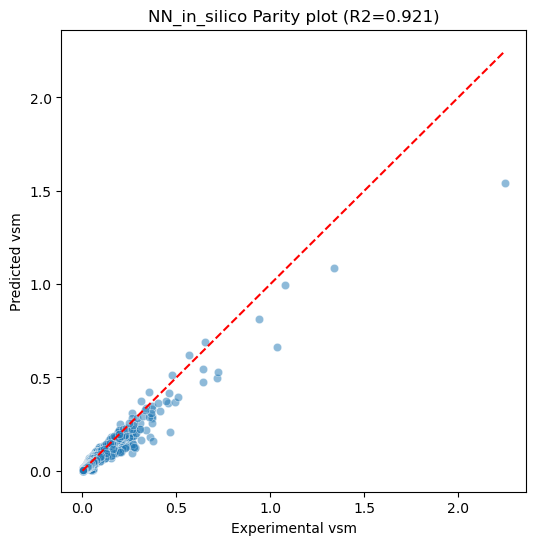

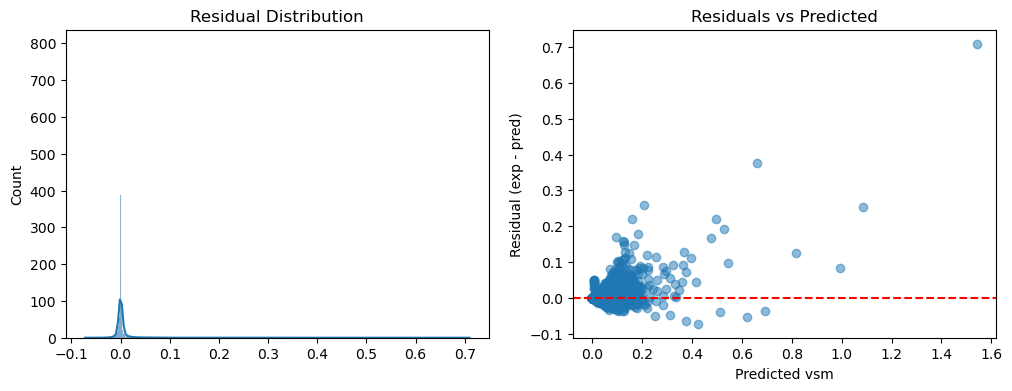

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5088\2988477872.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped2['mean'], y=grouped2.index, palette='viridis')


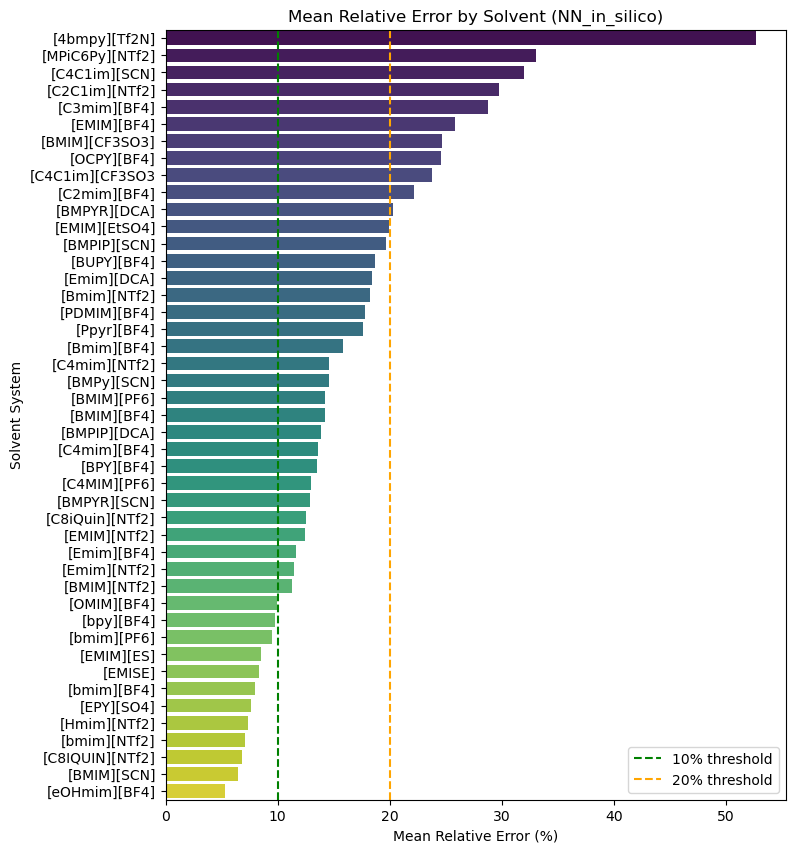

✅ همه شکل‌ها در پوشه ذخیره شدند: C:\Users\Win 10\Documents\aberham\figures_in_silico


In [8]:
# --- سلول C ---
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig_folder2 = r"C:\Users\Win 10\Documents\aberham\figures_in_silico"
os.makedirs(fig_folder2, exist_ok=True)

# 1️⃣ Parity plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_all2, y=y_pred_all2, alpha=0.5)
plt.plot([y_all2.min(), y_all2.max()], [y_all2.min(), y_all2.max()], 'r--')
plt.xlabel('Experimental vsm')
plt.ylabel('Predicted vsm')
plt.title(f'NN_in_silico Parity plot (R2={r2_all2:.3f})')
plt.savefig(os.path.join(fig_folder2,"parity_plot_in_silico.png"), dpi=300, bbox_inches='tight')
plt.show()

# 2️⃣ Residuals plots
residuals2 = y_all2 - y_pred_all2
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(residuals2, kde=True)
plt.title('Residual Distribution')
plt.subplot(1,2,2)
plt.scatter(y_pred_all2, residuals2, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted vsm')
plt.ylabel('Residual (exp - pred)')
plt.title('Residuals vs Predicted')
plt.savefig(os.path.join(fig_folder2,"residuals_in_silico.png"), dpi=300, bbox_inches='tight')
plt.show()

# 3️⃣ Mean relative error per solvent
grouped2 = pred_df2.groupby('solvent1')['rel_error_pct'].agg(['mean','median','std','count']).sort_values('mean', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=grouped2['mean'], y=grouped2.index, palette='viridis')
plt.axvline(10, color='green', linestyle='--', label='10% threshold')
plt.axvline(20, color='orange', linestyle='--', label='20% threshold')
plt.xlabel('Mean Relative Error (%)')
plt.ylabel('Solvent System')
plt.title('Mean Relative Error by Solvent (NN_in_silico)')
plt.legend()
plt.savefig(os.path.join(fig_folder2,"MRE_by_solvent_in_silico.png"), dpi=300, bbox_inches='tight')
plt.show()

print("✅ همه شکل‌ها در پوشه ذخیره شدند:", fig_folder2)


In [9]:
# --- سلول D ---
grouped_path2 = r"C:\Users\Win 10\Documents\aberham\per_solvent_rel_error_in_silico.csv"
grouped2.to_csv(grouped_path2)
top_err2 = pred_df2.sort_values('rel_error_pct', ascending=False).head(50)
top_err_path2 = r"C:\Users\Win 10\Documents\aberham\top_50_errors_in_silico.csv"
top_err2.to_csv(top_err_path2, index=False)
print("✅ Saved per-solvent and top-50 error tables.")


✅ Saved per-solvent and top-50 error tables.


In [10]:
# --- سلول E ---
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
import pandas as pd

doc2 = Document()
doc2.add_heading('Neural Network Viscosity Prediction Report (in_silico)', level=1)

doc2.add_paragraph(f"Dataset: Abraham_Viscosity_Model_in_silico.xlsx (N = {len(df2)})")
doc2.add_paragraph(f"RMSE = {rmse_all2:.5f}, R² = {r2_all2:.4f}, MAPE = {mape_all2:.2f}%")

# افزودن شکل‌ها
def add_image(doc, path, caption):
    doc.add_picture(path, width=Inches(5.5))
    doc.paragraphs[-1].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    doc.add_paragraph(caption, style='Intense Quote')

add_image(doc2, os.path.join(fig_folder2,"parity_plot_in_silico.png"), "Figure 1. Parity plot (NN_in_silico).")
add_image(doc2, os.path.join(fig_folder2,"residuals_in_silico.png"), "Figure 2. Residuals and distribution.")
add_image(doc2, os.path.join(fig_folder2,"MRE_by_solvent_in_silico.png"), "Figure 3. Mean Relative Error by solvent.")

word_path2 = r"C:\Users\Win 10\Documents\aberham\NN_report_in_silico.docx"
doc2.save(word_path2)
print("✅ Word report saved:", word_path2)


✅ Word report saved: C:\Users\Win 10\Documents\aberham\NN_report_in_silico.docx


In [12]:
# =====================================================
# 🧭 آماده‌سازی داده‌های ورودی برای مدل‌های کلاسیک
# =====================================================
from sklearn.preprocessing import StandardScaler

# مقیاس‌گذاری (scaling) ویژگی‌ها
scaler_X2 = StandardScaler()
X2_train_scaled = scaler_X2.fit_transform(X2_train)
X2_test_scaled  = scaler_X2.transform(X2_test)

print("✅ X2_train_scaled و X2_test_scaled ساخته شدند.")


✅ X2_train_scaled و X2_test_scaled ساخته شدند.


In [13]:
# =====================================================
# 🔹 Classic ML models for NN_in_silico comparison (final & corrected)
# =====================================================

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# --- آماده‌سازی داده‌ها ---
y2_train_np = np.array(y2_train).reshape(-1, 1)
y2_test_np  = np.array(y2_test).reshape(-1, 1)

# --- تابع کمکی برای تبدیل خروجی مدل‌ها به مقیاس واقعی (viscosity) ---
def to_real_units_2(y_pred_scaled):
    y_pred_log = y_scaler2.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
    return np.power(10, y_pred_log)

# =====================================================
# 🔸 1. Multiple Linear Regression (MLR)
# =====================================================
mlr2 = LinearRegression()
mlr2.fit(X2_train_scaled, y2_train_np)
y_mlr2_pred_scaled = mlr2.predict(X2_test_scaled)
y_mlr2_pred_real = to_real_units_2(y_mlr2_pred_scaled)

# =====================================================
# 🔸 2. Support Vector Regression (SVR)
# =====================================================
svr2 = SVR(kernel='rbf', C=10, gamma='scale')
svr2.fit(X2_train_scaled, y2_train_np.ravel())
y_svr2_pred_scaled = svr2.predict(X2_test_scaled)
y_svr2_pred_real = to_real_units_2(y_svr2_pred_scaled)

# =====================================================
# 🔸 3. Random Forest Regressor (RF)
# =====================================================
rf2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf2.fit(X2_train_scaled, y2_train_np.ravel())
y_rf2_pred_scaled = rf2.predict(X2_test_scaled)
y_rf2_pred_real = to_real_units_2(y_rf2_pred_scaled)

# =====================================================
# 🔸 4. Calculate metrics
# =====================================================
def metrics(y_true, y_pred):
    return (
        np.sqrt(mean_squared_error(y_true, y_pred)),
        r2_score(y_true, y_pred),
        mean_absolute_percentage_error(y_true, y_pred)*100
    )

y2_test_real_arr = np.array(y2_real)

rmse_mlr2, r2_mlr2, mape_mlr2 = metrics(y2_test_real_arr, y_mlr2_pred_real)
rmse_svr2, r2_svr2, mape_svr2 = metrics(y2_test_real_arr, y_svr2_pred_real)
rmse_rf2,  r2_rf2,  mape_rf2  = metrics(y2_test_real_arr, y_rf2_pred_real)

# =====================================================
# 🔸 5. NN performance (from your last training)
# =====================================================
r2_nn2 = 0.9219
rmse_nn2 = 0.0130
mape_nn2 = 15.32

# =====================================================
# 🔸 6. Compare all models and save table
# =====================================================
comparison_in_silico = pd.DataFrame({
    'Model': ['NN_in_silico', 'MLR', 'SVR', 'RF'],
    'R2': [r2_nn2, r2_mlr2, r2_svr2, r2_rf2],
    'RMSE': [rmse_nn2, rmse_mlr2, rmse_svr2, rmse_rf2],
    'MAPE (%)': [mape_nn2, mape_mlr2, mape_svr2, mape_rf2]
})

comparison_in_silico.to_excel(r"C:\Users\Win 10\Documents\aberham\Model_comparison_in_silico.xlsx", index=False)
print("✅ Saved:", r"C:\Users\Win 10\Documents\aberham\Model_comparison_in_silico.xlsx")
display(comparison_in_silico)


✅ Saved: C:\Users\Win 10\Documents\aberham\Model_comparison_in_silico.xlsx


,Model,R2,RMSE,MAPE (%)
0,NN_in_silico,0.921900,0.013000,15.320000
1,MLR,0.171499,0.042322,124.688429
2,SVR,0.967049,0.008440,12.306993
3,RF,0.957908,0.009539,10.223398


In [14]:
# =====================================================
# 🔹 5-Fold Cross-Validation for all models (in_silico)
# =====================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

X_all2 = X2.copy()
y_all2 = np.array(y2).reshape(-1, 1)

scaler_X2 = StandardScaler()
X_scaled2 = scaler_X2.fit_transform(X_all2)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results2 = []

def nn_model2(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled2)):
    Xtr, Xte = X_scaled2[train_idx], X_scaled2[test_idx]
    ytr, yte = y_all2[train_idx], y_all2[test_idx]

    y_scaler_cv2 = StandardScaler()
    ytr_scaled = y_scaler_cv2.fit_transform(ytr)

    # --- NN ---
    model_nn2 = nn_model2(Xtr.shape[1])
    model_nn2.fit(Xtr, ytr_scaled, epochs=100, batch_size=32, verbose=0)
    y_pred_nn = np.power(10, y_scaler_cv2.inverse_transform(model_nn2.predict(Xte)))
    y_true = np.power(10, yte)
    results2.append({
        'Model': 'NN',
        'Fold': fold+1,
        'R2': r2_score(y_true, y_pred_nn),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_nn)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred_nn)*100
    })

    # --- MLR ---
    mlr = LinearRegression().fit(Xtr, ytr_scaled)
    y_pred_mlr = np.power(10, y_scaler_cv2.inverse_transform(mlr.predict(Xte)))
    results2.append({
        'Model': 'MLR',
        'Fold': fold+1,
        'R2': r2_score(y_true, y_pred_mlr),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_mlr)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred_mlr)*100
    })

    # --- SVR ---
    svr = SVR(kernel='rbf', C=10, gamma='scale').fit(Xtr, ytr_scaled.ravel())
    y_pred_svr = np.power(10, y_scaler_cv2.inverse_transform(svr.predict(Xte).reshape(-1,1)))
    results2.append({
        'Model': 'SVR',
        'Fold': fold+1,
        'R2': r2_score(y_true, y_pred_svr),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_svr)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred_svr)*100
    })

    # --- RF ---
    rf = RandomForestRegressor(n_estimators=200, random_state=42).fit(Xtr, ytr_scaled.ravel())
    y_pred_rf = np.power(10, y_scaler_cv2.inverse_transform(rf.predict(Xte).reshape(-1,1)))
    results2.append({
        'Model': 'RF',
        'Fold': fold+1,
        'R2': r2_score(y_true, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred_rf)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred_rf)*100
    })

df_results2 = pd.DataFrame(results2)
summary2 = df_results2.groupby('Model')[['R2','RMSE','MAPE']].agg(['mean','std'])
summary2.to_excel(r"C:\Users\Win 10\Documents\aberham\CV_results_in_silico.xlsx")

print("✅ Cross-validation results saved as CV_results_in_silico.xlsx")
display(summary2)


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\Win 10\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ Cross-validation results saved as CV_results_in_silico.xlsx


R2                RMSE                  MAPE          
           mean       std      mean       std        mean       std
Model                                                              
MLR    0.206950  0.026727  0.057099  0.016262  114.071953  7.992010
NN     0.931650  0.041493  0.016977  0.009502   10.705665  1.558065
RF     0.905201  0.057836  0.020287  0.011643   10.208687  0.461497
SVR    0.941435  0.044550  0.015395  0.009680   11.237535  0.623897

In [15]:
# ==========================================================
# ✅ FINAL VERSION — All_models_summary_in_silico
# ==========================================================
import pandas as pd
import os

base_path = r"C:\Users\Win 10\Documents\aberham"

# ------------------------------
# 1️⃣ Load base files
# ------------------------------
model_comp = pd.read_excel(os.path.join(base_path, "Model_comparison_in_silico.xlsx"))
nn_overall = pd.read_csv(os.path.join(base_path, "NN_overall_metrics_in_silico.csv"))

# ------------------------------
# 2️⃣ Clean NN_overall
# ------------------------------
nn_overall_clean = nn_overall.pivot_table(index=None, columns='metric', values='value').reset_index(drop=True)
nn_overall_clean.columns.name = None
nn_overall_clean["Model"] = "NN_in_silico"
nn_overall_clean["Dataset"] = "in_silico"

# ------------------------------
# 3️⃣ Load CV_results_in_silico.xlsx properly
# ------------------------------
cv_df = pd.read_excel(os.path.join(base_path, "CV_results_in_silico.xlsx"), skiprows=2)

# Rename actual columns by position (based on real file structure)
cv_df = cv_df.rename(columns={
    cv_df.columns[0]: "Model",
    cv_df.columns[1]: "R2_CV",
    cv_df.columns[3]: "RMSE_CV",
    cv_df.columns[5]: "MAPE_CV"
})

cv_df = cv_df[["Model", "R2_CV", "RMSE_CV", "MAPE_CV"]]
cv_df["Dataset"] = "in_silico"
cv_df["Model"] = cv_df["Model"].replace({"NN": "NN_in_silico"}).astype(str).str.strip()

# ------------------------------
# 4️⃣ Merge everything
# ------------------------------
model_comp["Dataset"] = "in_silico"
summary_table = pd.merge(model_comp, cv_df, on=["Model", "Dataset"], how='left')
summary_table = pd.concat([summary_table, nn_overall_clean], ignore_index=True)

# ------------------------------
# 5️⃣ Rename and reorder
# ------------------------------
summary_table = summary_table.rename(columns={
    "R2": "R2_total",
    "RMSE": "RMSE_total",
    "MAPE (%)": "MAPE_total"
})

summary_table = summary_table[[
    "Model", "Dataset",
    "R2_total", "RMSE_total", "MAPE_total",
    "R2_CV", "RMSE_CV", "MAPE_CV"
]]

# ------------------------------
# 6️⃣ Save
# ------------------------------
output_path = os.path.join(base_path, "All_models_summary_in_silico.xlsx")
try:
    summary_table.to_excel(output_path, index=False)
    print(f"✅ Final summary table saved successfully: {output_path}")
except PermissionError:
    alt_path = os.path.join(base_path, "All_models_summary_in_silico_new.xlsx")
    summary_table.to_excel(alt_path, index=False)
    print(f"⚠️ File open, saved as new file: {alt_path}")

summary_table


✅ Final summary table saved successfully: C:\Users\Win 10\Documents\aberham\All_models_summary_in_silico.xlsx


,Model,Dataset,R2_total,RMSE_total,MAPE_total,R2_CV,RMSE_CV,MAPE_CV
0,NN_in_silico,in_silico,0.921900,0.013000,15.320000,0.931650,0.016977,10.705665
1,MLR,in_silico,0.171499,0.042322,124.688429,0.206950,0.057099,114.071953
2,SVR,in_silico,0.967049,0.008440,12.306993,0.941435,0.015395,11.237535
3,RF,in_silico,0.957908,0.009539,10.223398,0.905201,0.020287,10.208687
4,NN_in_silico,in_silico,0.921020,0.018591,NaN,NaN,NaN,NaN
